## This is My CA 1

## 1.Exploratory Data Analysis

### Libraries

In [688]:
# Load Libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1.Irish Accommodation

In [87]:
#Reading the dataset
data = pd.read_csv("irish_accomodations.csv")

In [89]:
data.head(5)

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
1,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
2,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
3,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
4,Caseys Caravan Park,http://www.caseyscaravanpark.com,+353(0)749155376,-7.837826,55.195124,Donegal,Downings,Republic of Ireland,Camping


In [91]:
#erasing non-relative features 
df=data.drop(["Url","Telephone","AddressCountry"],axis=1)

In [720]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2458 non-null   object 
 1   Longitude        2458 non-null   float64
 2   Latitude         2458 non-null   float64
 3   AddressRegion    2458 non-null   object 
 4   AddressLocality  2274 non-null   object 
 5   Tags             2458 non-null   object 
dtypes: float64(2), object(4)
memory usage: 115.3+ KB


In [95]:
#Renaming the colums for easier access 
df_1=df.rename(columns={"Longitude":"longitude", "Latitude": "latitude",	"AddressRegion":"county","AddressLocality":"town", "Tags":"tags"})

In [97]:
#Cheking for missig values
df_1.isnull().sum()

Name           0
longitude      0
latitude       0
county         0
town         184
tags           0
dtype: int64

In [722]:
#using shape to see the total observations and features
df_1.shape

(2458, 6)

In [724]:
#checking the type of every feature
df_1.dtypes

Name          object
longitude    float64
latitude     float64
county        object
town          object
tags          object
dtype: object

In [103]:
# Check unique values for Town and Country
df_1['county'].unique()

array(['Cork', 'Sligo', 'Donegal', 'Kerry', 'Tipperary', 'Wicklow',
       'Waterford', 'Mayo', 'Cavan', 'Clare', 'Galway', 'Wexford',
       'Limerick', 'Westmeath', 'Kilkenny', 'Laois', 'Kildare', 'Carlow',
       'Longford', 'Monaghan', 'Offaly', 'Roscommon', 'Leitrim', 'Meath',
       'Louth', 'Dublin'], dtype=object)

In [105]:
#counting accommodation per county
acco=df_1['county'].value_counts()
acco

county
Kerry        321
Cork         268
Galway       257
Dublin       234
Donegal      197
Mayo         160
Clare        156
Wexford       87
Tipperary     81
Wicklow       74
Meath         65
Waterford     61
Sligo         61
Limerick      59
Kilkenny      53
Kildare       49
Cavan         44
Leitrim       38
Louth         35
Westmeath     34
Monaghan      26
Roscommon     24
Offaly        22
Carlow        22
Laois         20
Longford      10
Name: count, dtype: int64

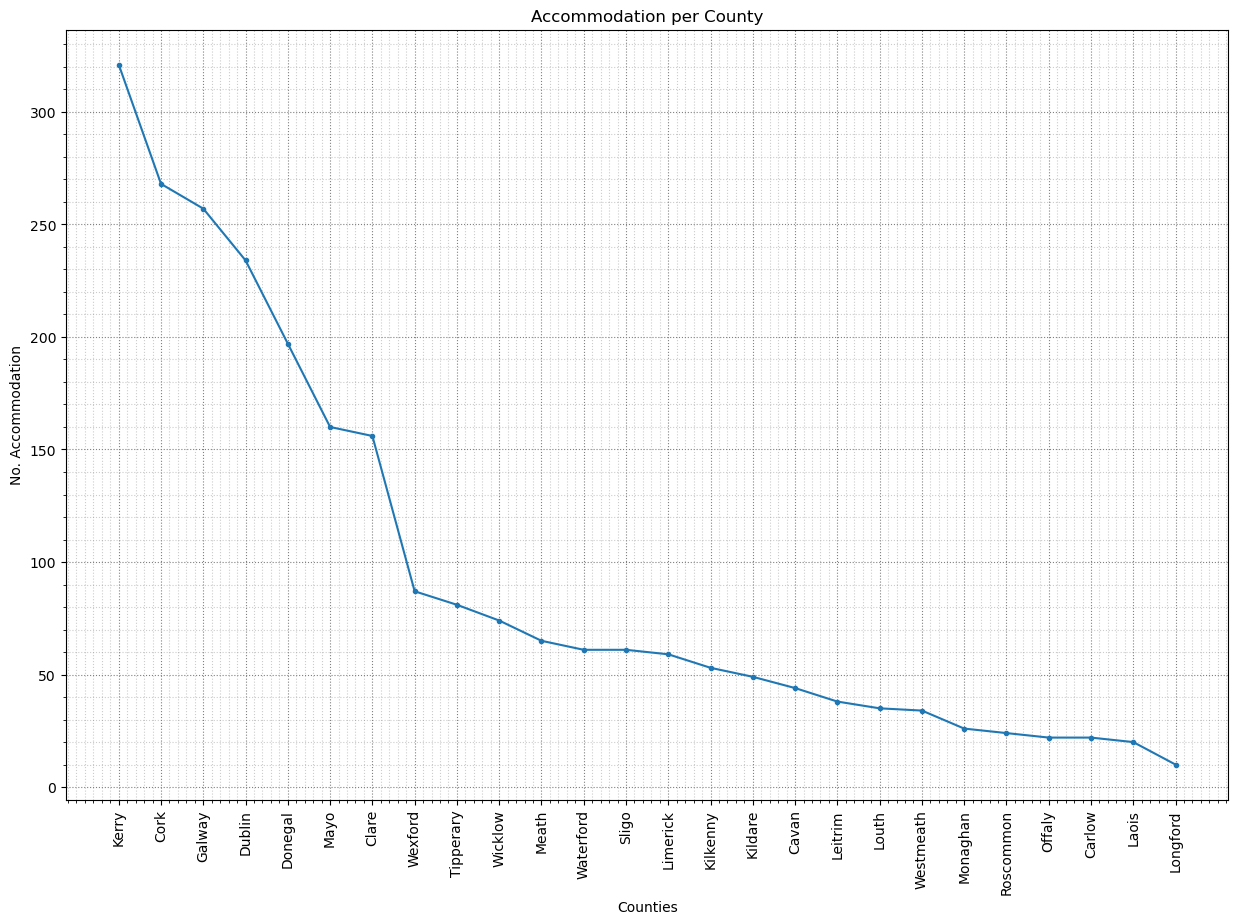

In [107]:
#ploting the number of accommodation per county
fig = plt.subplots(figsize = (15, 10))
plt.plot(acco, ".-")

plt.title('Accommodation per County')
plt.xlabel('Counties')
plt.ylabel('No. Accommodation')

plt.ylim()
plt.xlim()

plt.grid(which='major', color='grey', linestyle='dotted')
plt.grid(which='minor', color='grey', linestyle='dotted', alpha = 0.4)
plt.minorticks_on()
plt.xticks(rotation='vertical')
#plt.savefig('test.png')
#plt.close()
plt.show()

### 1.2. Irish Attracctions

In [109]:
attractions = pd.read_csv("irish_attractions.csv")
attractions.head()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Dun na Rí Forest Park,http://www.coillte.ie/site/dun-a-ri-forest-park/,353494331942,-6.792661,53.918978,Cavan,Kingscourt,Ireland,"Walking,Forest Park,Park and Forest Walk,Natio..."
1,Newcastle Woods,https://www.longford.ie/en/visit/trails/newcas...,353433343509,-7.726107,53.562124,Longford,NaN,Ireland,"Walking,Natural Landscape"
2,Rinn Duin Castle Loop,https://www.sportireland.ie/outdoors/walking/t...,+353(0)906630252,-8.004326,53.544197,Roscommon,NaN,Republic of Ireland,"Walking,Castle,Historic Houses and Castle,Ruins"
3,Knock Museum,https://www.knockshrine.ie/key-places-to-visit...,353949388100,-8.917153,53.790004,Mayo,Knock,Ireland,"Church Abbey,Monastery,Churches,Abbeys and Mon..."
4,Michael J Quill Centre,http://www.historic-ireland.com/places/778.html,353646685511,-9.461430,51.902656,Kerry,Kilgarvan,Republic of Ireland,Museums and Attraction


In [111]:
#Drop columns
df_at=attractions.drop(["Url","Telephone","AddressCountry","Tags"],axis=1)

In [113]:
#Renaming the colums for easier access 
df_att=df_at.rename(columns={"Longitude":"longitude", "Latitude": "latitude","AddressRegion":"county","AddressLocality":"town"})

In [115]:
df_att

,Name,longitude,latitude,county,town
0,Dun na Rí Forest Park,-6.792661,53.918978,Cavan,Kingscourt
1,Newcastle Woods,-7.726107,53.562124,Longford,NaN
2,Rinn Duin Castle Loop,-8.004326,53.544197,Roscommon,NaN
3,Knock Museum,-8.917153,53.790004,Mayo,Knock
4,Michael J Quill Centre,-9.461430,51.902656,Kerry,Kilgarvan
...,...,...,...,...,...
178,The Kennedy Homestead,-6.980866,52.346306,Wexford,Dunganstown
179,Michael Collins Centre,-8.821391,51.643161,Cork,Clonakilty
180,"The Quiet Man Museum, Tours & Giftshop",-9.288115,53.540871,Mayo,Cong
181,St Brigid's Well & Shrine,-7.352575,53.549530,Westmeath,NaN


In [123]:
#checking for missing values
df_att.isnull().sum()


Name          0
longitude     0
latitude      0
county        0
town         63
dtype: int64

In [125]:
#Counting the number of attranctions in each countie
attrac=df_att['county'].value_counts()
attrac

county
Kerry        33
Cork         26
Galway       14
Mayo         14
Wexford      10
Sligo         8
Waterford     8
Louth         7
Limerick      7
Donegal       7
Tipperary     7
Kilkenny      5
Meath         5
Clare         5
Laois         4
Carlow        4
Kildare       4
Longford      3
Leitrim       3
Cavan         3
Wicklow       2
Roscommon     2
Dublin        1
Westmeath     1
Name: count, dtype: int64

<Axes: xlabel='county', ylabel='No. of Attractions'>

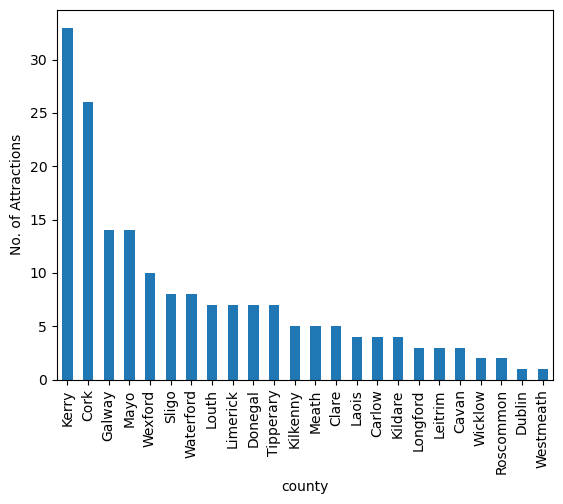

In [127]:
# Barplot
attrac.plot(kind="bar",ylabel="No. of Attractions")

### 1.3.Irish Activities

In [73]:
activities=pd.read_csv("irish_activities.csv")
activities.head(5)


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Bella & Brava Restaurant,https://bellabravarestaurant.com/,353719306727,-8.605609,54.171017,Sligo,Coolaney,Ireland,"Food and Drink,Restaurant,Local Produce"
1,The Adventure Islands,https://www.theadventureisland.com/,353862518252,-9.630803,53.827844,Mayo,Westport,Ireland,"Kayaking,Activity Operator,Walking,Day Tour,To..."
2,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,NaN,Ireland,"Traditionally Irish,Venue,Music"
3,Kilclooney Wood,http://www.coillte.ie,NaN,-7.426484,52.203447,Waterford,Kilmacthomas,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
4,The Ring of Kerry Cycle Route,NaN,+353(0)646631633,-9.750439,52.167083,Kerry,NaN,Republic of Ireland,Cycling


In [75]:
#Drop columns
df_a=activities.drop(["Url","Telephone","AddressCountry","Tags"],axis=1)

In [726]:
#information of the dataset
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6107 non-null   object 
 1   Longitude        6107 non-null   float64
 2   Latitude         6107 non-null   float64
 3   AddressRegion    6107 non-null   object 
 4   AddressLocality  5996 non-null   object 
dtypes: float64(2), object(3)
memory usage: 238.7+ KB


In [79]:
#Renaming the colums for easier access 
df_act=df_a.rename(columns={"Longitude":"longitude", "Latitude": "latitude","AddressRegion":"county","AddressLocality":"town"})

In [81]:
#checking for missing values
df_act.isnull().sum()

Name           0
longitude      0
latitude       0
county         0
town         111
dtype: int64

In [728]:
#counting the total values per county
act=df_act['county'].value_counts()
act

county
Dublin       1140
Cork          653
Kerry         535
Galway        504
Donegal       391
Mayo          336
Clare         324
Waterford     215
Wicklow       200
Wexford       192
Sligo         191
Limerick      182
Kilkenny      181
Tipperary     156
Kildare       133
Meath         123
Louth         104
Westmeath     103
Carlow         76
Offaly         69
Roscommon      66
Laois          57
Cavan          55
Leitrim        53
Monaghan       41
Longford       27
Name: count, dtype: int64

<Axes: xlabel='county', ylabel='No. of Activities'>

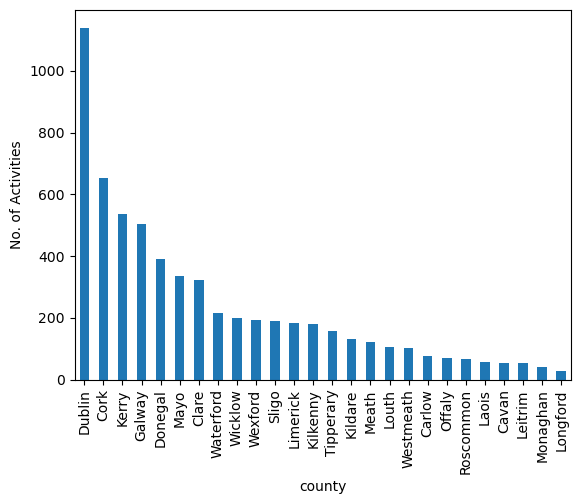

In [85]:
# Barplot
act.plot(kind="bar",ylabel="No. of Activities")

### 1.4.Creating a new Dataset

In [218]:
# Concatenate horizontally
combined_df1 = pd.concat([acco, act, attrac], axis=1)
combined_df1.columns =["accommodation","activities","attractions"]
#replacin Nan values per interpolate values
combined_df=combined_df1.interpolate(method='linear', direction = 'forward')
combined_df

,accommodation,activities,attractions
county,,,
Kerry,321,535,33.0
Cork,268,653,26.0
Galway,257,504,14.0
Dublin,234,1140,1.0
Donegal,197,391,7.0
Mayo,160,336,14.0
Clare,156,324,5.0
Wexford,87,192,10.0
Tipperary,81,156,7.0


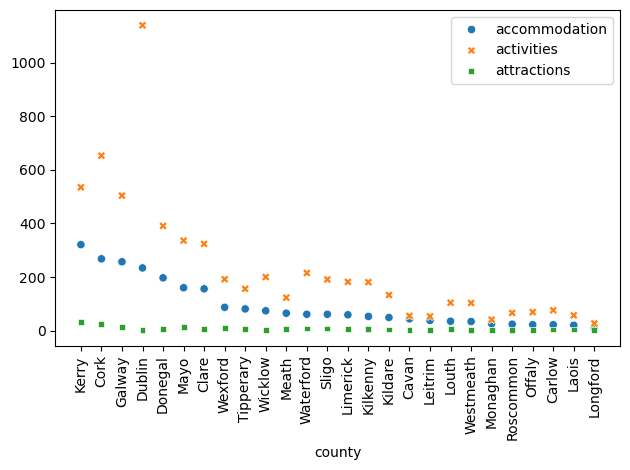

In [222]:
#plotting
sns.scatterplot(combined_df)
plt.xticks(rotation=90)
plt.tight_layout()

## 2. Visualization

### Libraries

In [694]:
# libraries for visualization
import seaborn as sns
from numpy import median, mean
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap


### 2.1 Pairplot

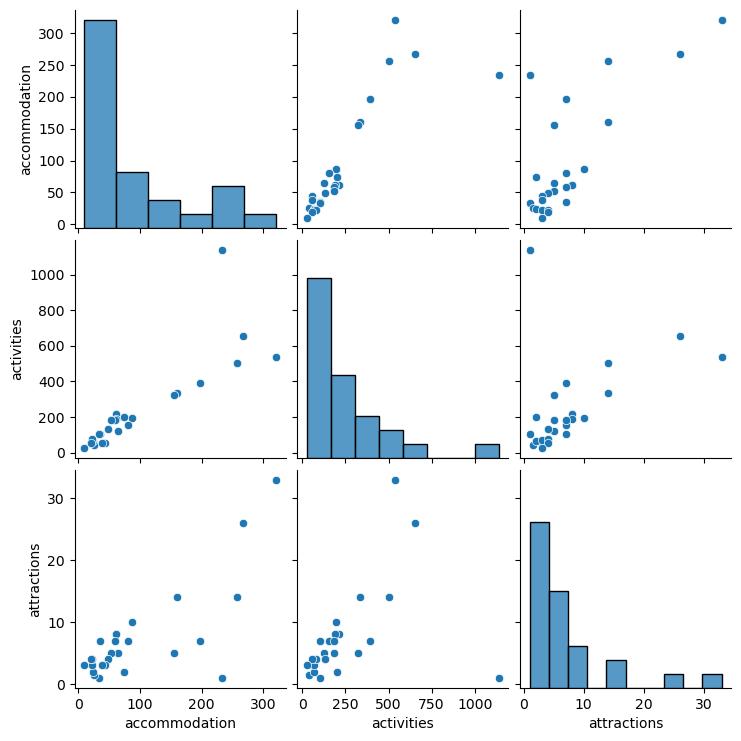

In [161]:
#ploting accommodation, activities and attractions to see the relationship between them
sns.pairplot(combined_df)

### 2.2Box plot

<Axes: >

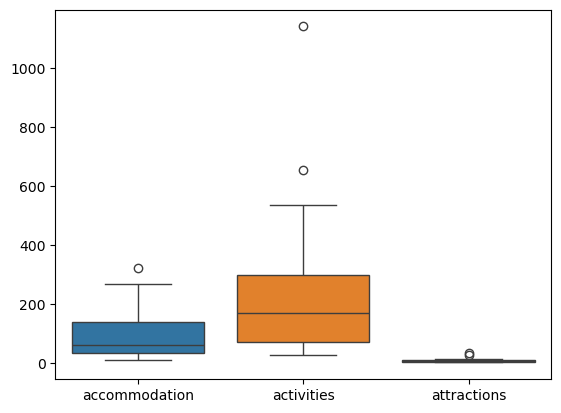

In [163]:
# boxplot to see possibles outliers
sns.boxplot(combined_df)

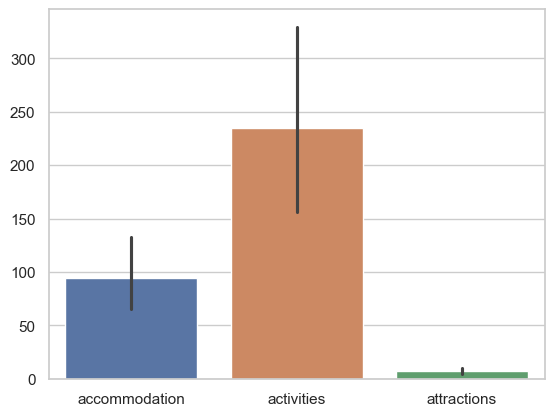

In [169]:
#boxplot mean
sns.set(style="whitegrid")
ax = sns.barplot(data=combined_df,estimator=mean)

### 2.3 Correlation Matrix heatmap

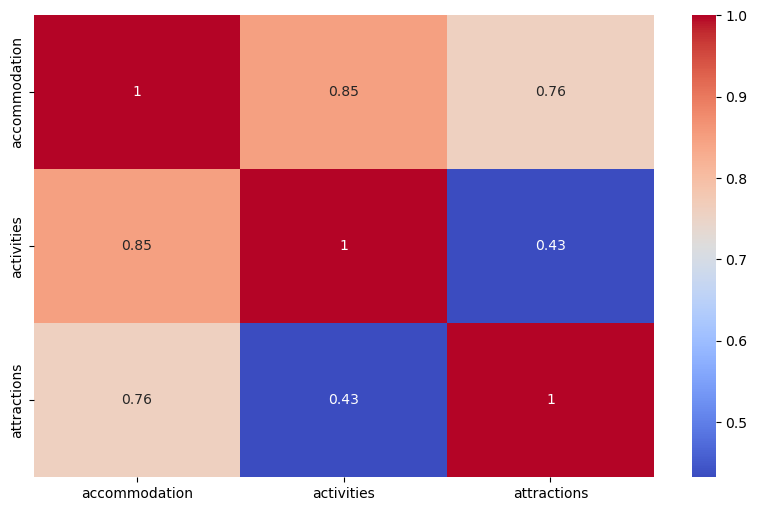

In [165]:
#correlation matrix
numeric_df = combined_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
correlation = numeric_df.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True)
plt.show()

### 2.4 Scatter plot

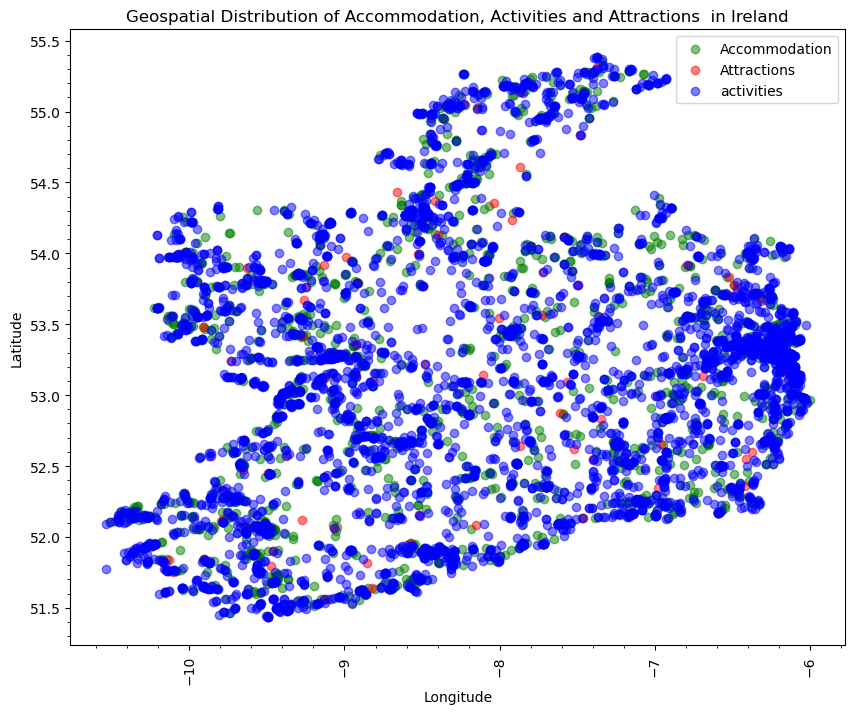

In [61]:
#scatter plot of accommodations, attracctions and activities in Ireland
plt.figure(figsize=(10, 8))


plt.scatter(df_1['longitude'], df_1['latitude'], alpha=0.5, color="green",label="Accommodation")
plt.scatter(df_att['longitude'], df_att['latitude'], alpha=0.5,color="red", label="Attractions")
plt.scatter(df_act['longitude'], df_act['latitude'], alpha=0.5, color="blue",label="activities")

plt.title('Geospatial Distribution of Accommodation, Activities and Attractions  in Ireland')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.grid(which='major', color='grey', linestyle='dotted')
#plt.grid(which='minor', color='lightgrey', linestyle='dotted', alpha = 0.4)
plt.minorticks_on()
plt.xticks(rotation='vertical')
plt.legend()
ax.grid(True)
plt.show()

### 2.5 Interactive map

In [181]:
#Localization of the attracctions in ireland

# Create a base map centered on Ireland
map_ireland = folium.Map(location=[53.1424, -7.6921], zoom_start=7)

for index, row in df_att.iterrows():
    folium.Marker([row['latitude'], row['longitude']],popup=row["Name"],icon=folium.Icon(color='red')).add_to(map_ireland)    

# Code for accomodation    
#for index, row in df_1.iterrows():
#    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color='green')).add_to(map_ireland)    

#code for activities
#for index, row in df_act.iterrows():
#    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color='blue')).add_to(map_ireland)    
    
# Show the map
map_ireland

### 2.6.Density Heatmap

In [730]:
#heatmap to visualize where most accommodations, activities and attractions are located

# Prepare data for the heatmap (list of [latitude, longitude] pairs)
heat_data = [[row['latitude'], row['longitude']] for index, row in df_1.iterrows()]
heat_data = [[row['latitude'], row['longitude']] for index, row in df_act.iterrows()]
heat_data = [[row['latitude'], row['longitude']] for index, row in df_att.iterrows()]
# Create a heatmap
map_ireland_heatmap = folium.Map(location=[53.1424, -7.6921], zoom_start=6)
HeatMap(heat_data).add_to(map_ireland_heatmap)

# Show the heatmap
map_ireland_heatmap

## 3. Statistics

### Libraries

In [697]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew

### 3.1. Distribition

#### 3.1.1 Uniform Distribution

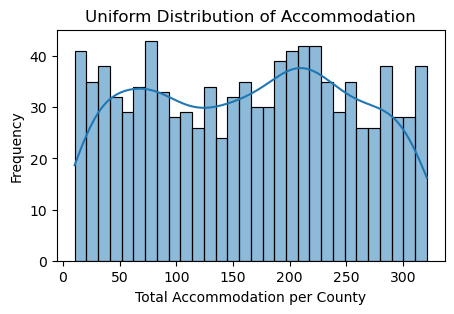

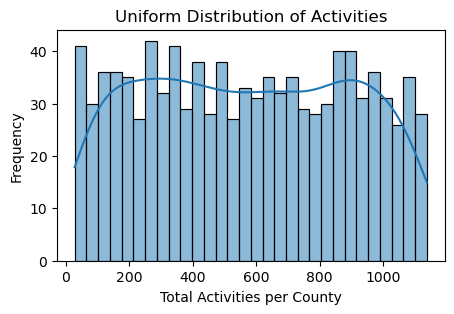

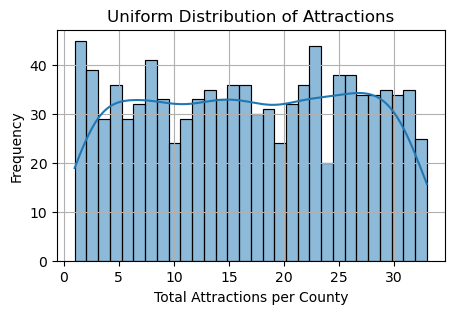

In [115]:
# Assume a uniform distribution for accommodation
uniform_data = np.random.uniform(low=acco.min(), high=acco.max(), size=1000)

# Plot
plt.figure(figsize=(5, 3))
sns.histplot(uniform_data, bins=30, kde=True)
plt.title('Uniform Distribution of Accommodation')
plt.xlabel('Total Accommodation per County')
plt.ylabel('Frequency')

# Assume a uniform distribution for activities
uniform_data_act = np.random.uniform(low=act.min(), high=act.max(), size=1000)

# Plot
plt.figure(figsize=(5, 3))
sns.histplot(uniform_data_act, bins=30, kde=True)
plt.title('Uniform Distribution of Activities')
plt.xlabel('Total Activities per County')
plt.ylabel('Frequency')

# Assume a uniform distribution for attractions
uniform_data_att = np.random.uniform(low=attrac.min(), high=attrac.max(), size=1000)

# Plot
plt.figure(figsize=(5, 3))
sns.histplot(uniform_data_att, bins=30, kde=True)
plt.title('Uniform Distribution of Attractions')
plt.xlabel('Total Attractions per County')
plt.ylabel('Frequency')
plt.grid()
plt.show()


#### 3.1.2 Normal Distribution

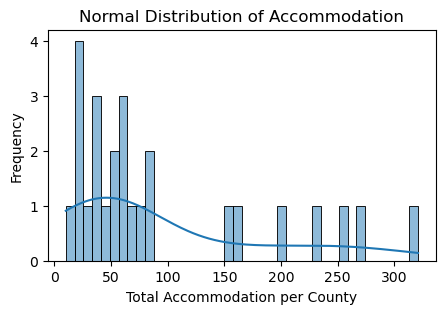

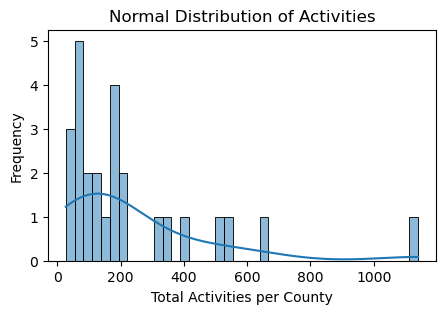

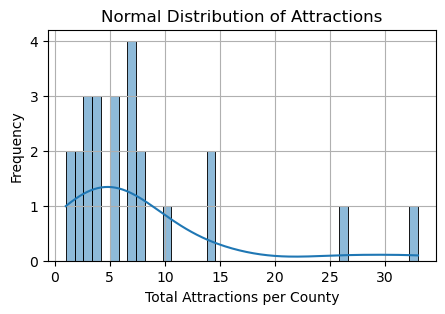

In [732]:
#plotting normal distribution
plt.figure(figsize=(5, 3))
sns.histplot(acco, bins=40, kde=True)
plt.title('Normal Distribution of Accommodation')
plt.xlabel('Total Accommodation per County')
plt.ylabel('Frequency')

plt.figure(figsize=(5, 3))
sns.histplot(act, bins=40, kde=True)
plt.title('Normal Distribution of Activities')
plt.xlabel('Total Activities per County')
plt.ylabel('Frequency')

plt.figure(figsize=(5, 3))
sns.histplot(attrac, bins=40, kde=True)
plt.title('Normal Distribution of Attractions')
plt.xlabel('Total Attractions per County')
plt.ylabel('Frequency')


plt.grid()
plt.show()

#### 3.1.3 Poisson Distribution

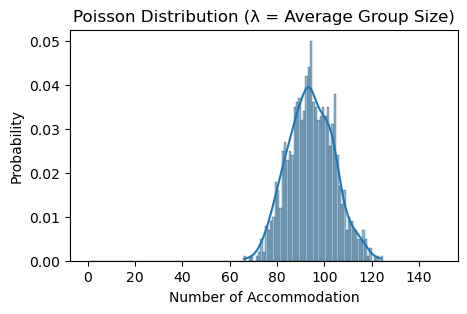

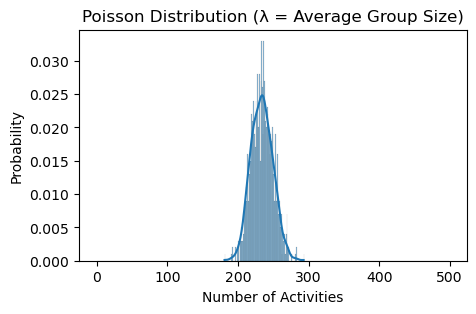

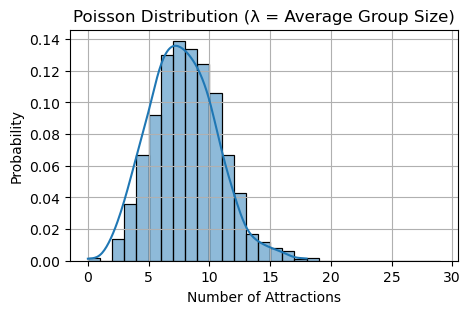

In [119]:
#Probability of Accommodation per county

accomm=df_1['county'].value_counts()
lambda_rate_acco = acco.mean()
lambda_rate_act = act.mean()
lambda_rate_att = attrac.mean()


# Generate Poisson distribution data
poisson_acco = np.random.poisson(lambda_rate_acco, 1000)
poisson_act = np.random.poisson(lambda_rate_act, 1000)
poisson_att = np.random.poisson(lambda_rate_att, 1000)

# Plot
plt.figure(figsize=(5, 3))
sns.histplot(poisson_acco, bins=range(0, 150), kde=True, stat='probability')
plt.title('Poisson Distribution (λ = Average Group Size)')
plt.xlabel('Number of Accommodation')
plt.ylabel('Probability')

plt.figure(figsize=(5, 3))
sns.histplot(poisson_act, bins=range(0, 500), kde=True, stat='probability')
plt.title('Poisson Distribution (λ = Average Group Size)')
plt.xlabel('Number of Activities')
plt.ylabel('Probability')
plt.figure(figsize=(5, 3))

sns.histplot(poisson_att, bins=range(0, 30), kde=True, stat='probability')
plt.title('Poisson Distribution (λ = Average Group Size)')
plt.xlabel('Number of Attractions')
plt.ylabel('Probability')

plt.grid()
plt.show()

#### 3.1.4 Kurtosis

In [734]:
#calculating kurtosis
accommodation_kurtosis = kurtosis(combined_df["accommodation"])
activities_kurtosis = kurtosis(combined_df["activities"])
attractions_kurtosis = kurtosis(combined_df["attractions"])
print(f"Kurtosis of Accommodation: {accommodation_kurtosis}")
print(f"Kurtosis of Activities: {activities_kurtosis}")
print(f"Kurtosis of Attractions: {attractions_kurtosis}")

Kurtosis of Accommodation: 0.22946016701505556
Kurtosis of Activities: 5.02537121724218
Kurtosis of Attractions: 4.671342211366463


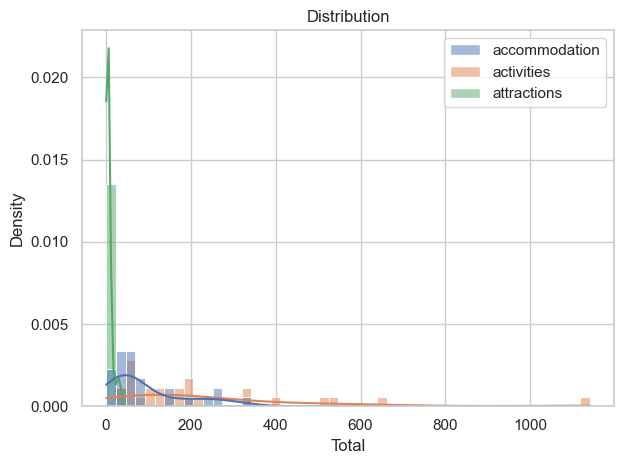

In [187]:
# Plot for Sep
plt.subplot()
sns.histplot(combined_df, bins=50, kde=True, color='lightgreen', stat="density")
plt.title('Distribution')
plt.xlabel('Total')
plt.ylabel('Density')

# Show the plots
plt.tight_layout()
plt.show()

#### 3.1.5 Skewness

In [135]:
#skewness of accommodation

skewness_acco = skew(acco)
skewness_act = skew(act)
skewness_att = skew(attrac)


print(f"Skewness of accommodation: {skewness_acco}")
print(f"Skewness of activities: {skewness_act}")
print(f"Skewness of attractions: {skewness_att}")

Skewness of accommodation: 1.2440243344990474
Skewness of activities: 2.180142804770401
Skewness of attractions: 2.1479235719247307


### 3.2. Central Tendency

#### 3.2.1 Mean

In [191]:
#creating a mean function
def calc_mean(arr):
    sums = 0  
    for x in range(len(arr)):
        sums += arr[x]
    mean = sums / len(arr) 
    return mean
import warnings
warnings.filterwarnings('ignore')

In [193]:
print(f"Mean of accommodation in Ireland: {calc_mean(acco)}")
print(f"Mean of activities in Ireland: {calc_mean(act)}")
print(f"Mean of attractions in Ireland: {calc_mean(attrac)}")


Mean of accomodation in Ireland: 94.53846153846153
Mean of activities in Ireland: 234.8846153846154
Mean of attractions in Ireland: 7.625


#### 3.2.2 Mode

In [188]:
#creating mode function
def calc_mode(arr):
    if len(arr) == 0:
        return None

    arr_count = {}
    for num in arr:
        if num in arr_count:
            arr_count[num] += 1
        else:
            arr_count[num] = 1

    max_count = max(arr_count.values())
    
    mode = [num for num, count in arr_count.items() if count == max_count]
    
    if len(mode) == len(arr):
        return "No unique mode"
    elif len(mode) == 2:
        return f"Two modes found: {mode}"
    else:
        return mode


In [214]:
print(f"Mode of accommodation in Ireland: {calc_mode(acco)}")
print(f"Mode of activities in Ireland: {calc_mode(act)}")
print(f"Mode of attractions in Ireland: {calc_mode(attrac)}")


Mode of accommodation in Ireland: Two modes found: [61, 22]
Mode of activities in Ireland: No unique mode
Mode of attractions in Ireland: [7]


#### 3.2.3. Median

In [195]:
#creating the median function
def calc_median(arr):
    if len(arr) == 0:
        return None
    arr.sort_values(ignore_index=True) 
    n = len(arr)
    if n % 2 == 0: 
        mid1 = arr[ n // 2 - 1]
        mid2 = arr[ n // 2]
        
        median = (mid1 + mid2) / 2
        return median
    else:
        return arr[n // 2]

In [197]:
print(f"Median of accommodation in Ireland: {calc_median(acco)}")
print(f"Median of activities in Ireland: {calc_median(act)}")
print(f"Median of attractions in Ireland: {calc_median(attrac)}")


Median of accomodation in Ireland: 60.0
Median of activities in Ireland: 168.5
Median of attractions in Ireland: 5.0


#### 3.2.4 Min, Max and Range

In [736]:
#calculating min, max and range
print(f"Min: {combined_df.min()}")
print(f"Max: {combined_df.max()}")
print(f"Range: {combined_df.max() - combined_df.min()}")

Min: accommodation    10.0
activities       27.0
attractions       1.0
dtype: float64
Max: accommodation     321.0
activities       1140.0
attractions        33.0
dtype: float64
Range: accommodation     311.0
activities       1113.0
attractions        32.0
dtype: float64


#### 3.2.5 Standard Deviation

In [204]:
#standard deviation function
def calc_stdev(arr):
    if len(arr) == 0:
        return None
    
    mean = sum(arr) / len(arr)
    variance = sum(( x - mean)**2 for x in arr) / len(arr)
    stdev = variance**0.5
    
    return stdev

In [206]:
print(f"Stardard Deviation of accommodation in Ireland: {calc_stdev(acco)}")
print(f"Stardard Deviation of activities in Ireland: {calc_stdev(act)}")
print(f"Stardard Deviation of attractions in Ireland: {calc_stdev(attrac)}")

Stardar Deviation of accomodation in Ireland: 87.81196290029261
Stardar Deviation of activities in Ireland: 242.81859752040236
Stardar Deviation of attractions in Ireland: 7.487837360235153


#### 3.2.6 The Five Number Summary(df.describe())

In [209]:
# the five number summary
combined_df.describe()

,accommodation,activities,attractions
count,26.000000,26.000000,26.000000
mean,94.538462,234.884615,7.211538
std,89.550982,247.627353,7.483546
min,10.000000,27.000000,1.000000
25%,34.250000,70.750000,3.000000
50%,60.000000,168.500000,5.000000
75%,138.750000,296.750000,7.750000
max,321.000000,1140.000000,33.000000


### 3.3 Measures of position

#### 3.3.1 Percentiles and IQR

In [738]:
#calculating percentile and IQR of Accommodation
print(f"25th Percentile of Accommodation: {np.percentile(acco, 25)}")
print(f"75th Percentile of Accommodation: {np.percentile(acco, 75)}")
print(f"IQR: {np.percentile(acco, 75) - np.percentile(acco, 25)}")

25th Percentile of Accommodation: 34.25
75th Percentile of Accommodation: 138.75
IQR: 104.5


In [746]:
#calculating percentile and IQR of Attractions
print(f"25th Percentile of Attracctions: {np.percentile(attrac, 25)}")
print(f"75th Percentile of Attracctions: {np.percentile(attrac, 75)}")
print(f"IQR: {np.percentile(attrac, 75) - np.percentile(attrac, 25)}")

25th Percentile of Attracctions: 3.0
75th Percentile of Attracctions: 8.0
IQR: 5.0


In [744]:
#calculating percentile and IQR of Acctivities
print(f"25th Percentile of Activities: {np.percentile(act, 25)}")
print(f"75th Percentile of Activities: {np.percentile(act, 75)}")
print(f"IQR: {np.percentile(act, 75) - np.percentile(act, 25)}")

25th Percentile of Activities: 70.75
75th Percentile of Activities: 296.75
IQR: 226.0


#### 3.3.2.1 Outliers Using IQR

In [228]:
# IQR Accommodation
Q1_acc = acco.quantile(0.25)
Q3_acc = acco.quantile(0.75)
IQR_acc = Q3_acc - Q1_acc
lower_bound_acc = Q1_acc - 1.5 * IQR_acc
upper_bound_acc = Q3_acc + 1.5 * IQR_acc
outliers_iqr_acc = acco[(acco < lower_bound_acc) | (acco > upper_bound_acc)]
outliers_iqr_acc


county
Kerry    321
Name: count, dtype: int64

In [230]:
#IQR Activities
Q1_act = act.quantile(0.25)
Q3_act = act.quantile(0.75)
IQR_act = Q3_act - Q1_act
lower_bound_act = Q1_act - 1.5 * IQR_act
upper_bound_act = Q3_act + 1.5 * IQR_act
outliers_iqr_act = act[(act < lower_bound_act) | (act > upper_bound_act)]
outliers_iqr_act


county
Dublin    1140
Cork       653
Name: count, dtype: int64

In [232]:
#IQR Attractions
Q1_att = attrac.quantile(0.25)
Q3_att = attrac.quantile(0.75)
IQR_att = Q3_att - Q1_att
lower_bound_att = Q1_att - 1.5 * IQR_att
upper_bound_att = Q3_att + 1.5 * IQR_att
outliers_iqr_att = attrac[(attrac < lower_bound_att) | (attrac > upper_bound_att)]
outliers_iqr_att


county
Kerry    33
Cork     26
Name: count, dtype: int64

#### 3.3.3. Z-Score

In [233]:
#checking for outliers in 'Irish Accommodation' according to Z-Score
from scipy import stats
z_scores = stats.zscore(acco)
outliers_acc = acco[abs(z_scores) > 3]
print(f"Number of Outliers found: {outliers_acc}")

Number of Outliers found: Series([], Name: count, dtype: int64)


In [235]:
#Checking for outliers in 'Irish Attracctions' according to Z-Score
z_scores1 = stats.zscore(attrac)
outliers_att = attrac[abs(z_scores1) > 3]
outliers_att

county
Kerry    33
Name: count, dtype: int64

In [237]:
#Checking for outliers in 'Irish Activities' according to Z-Score
z_scores2 = stats.zscore(act)
outliers_act = act[abs(z_scores2) > 3]
outliers_act

county
Dublin    1140
Name: count, dtype: int64

## 4.Removing outliers

In [234]:
#IQR combined_df
Q1_c = combined_df.quantile(0.25)
Q3_c = combined_df.quantile(0.75)
IQR_c = Q3_c - Q1_c
lower_bound_c = Q1_c - 1.5 * IQR_c
upper_bound_c = Q3_c + 1.5 * IQR_c
outliers_iqr_c = combined_df[(combined_df < lower_bound_c) | (combined_df > upper_bound_c)]
outliers_iqr_c


,accommodation,activities,attractions
county,,,
Kerry,321.0,NaN,33.0
Cork,NaN,653.0,26.0
Galway,NaN,NaN,NaN
Dublin,NaN,1140.0,NaN
Donegal,NaN,NaN,NaN
Mayo,NaN,NaN,NaN
Clare,NaN,NaN,NaN
Wexford,NaN,NaN,NaN
Tipperary,NaN,NaN,NaN


In [432]:
c_no_outliers=combined_df[(combined_df>= lower_bound_c) & (combined_df<= upper_bound_c)]
c_no_outliers


,accommodation,activities,attractions
county,,,
Kerry,NaN,535.0,NaN
Cork,268.0,NaN,NaN
Galway,257.0,504.0,14.0
Dublin,234.0,NaN,1.0
Donegal,197.0,391.0,7.0
Mayo,160.0,336.0,14.0
Clare,156.0,324.0,5.0
Wexford,87.0,192.0,10.0
Tipperary,81.0,156.0,7.0


### 4.1. Imputation Method

In [643]:
#filling in the NaN
df_no_outliers=c_no_outliers.fillna(c_no_outliers.mean())
df_no_outliers

,accommodation,activities,attractions
county,,,
Kerry,85.48,535.00,5.354167
Cork,268.00,179.75,5.354167
Galway,257.00,504.00,14.000000
Dublin,234.00,179.75,1.000000
Donegal,197.00,391.00,7.000000
Mayo,160.00,336.00,14.000000
Clare,156.00,324.00,5.000000
Wexford,87.00,192.00,10.000000
Tipperary,81.00,156.00,7.000000


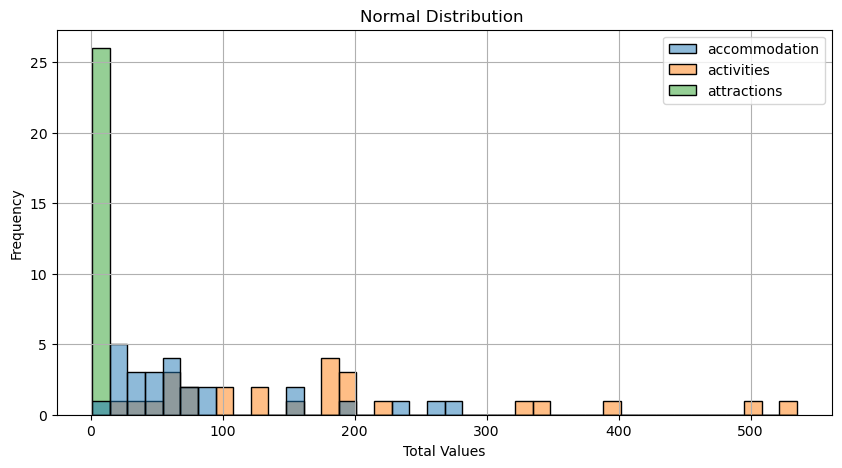

In [292]:
plt.figure(figsize=(10, 5))
sns.histplot(df_no_outliers, bins=40, kde=False)
plt.title('Normal Distribution ')
plt.xlabel('Total Values')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## 5. Machine Learning

### Libraries

In [716]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import warnings
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


### 5.1. K-means

In [664]:
df_no_outliers.head()

,accommodation,activities,attractions
county,,,
Kerry,85.48,535.00,5.354167
Cork,268.00,179.75,5.354167
Galway,257.00,504.00,14.000000
Dublin,234.00,179.75,1.000000
Donegal,197.00,391.00,7.000000


In [666]:
# Load values
x = df_no_outliers.values

# Applying KMeans to the dataset
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 0)

# n_initint, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


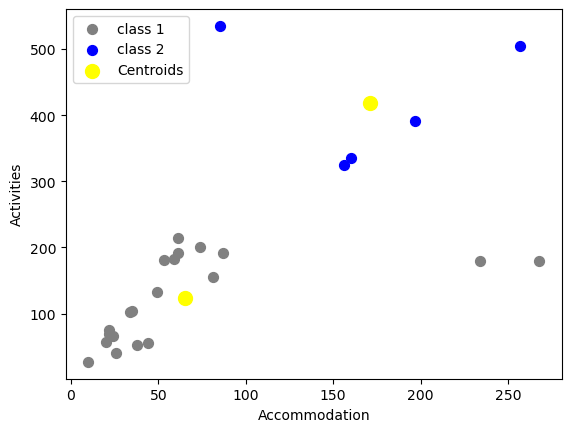

In [668]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'gray', label = 'class 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'class 2')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1:2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("Accommodation")
plt.ylabel("Activities")

plt.legend() 

### 5.1.1 Elbow method and silhouette score

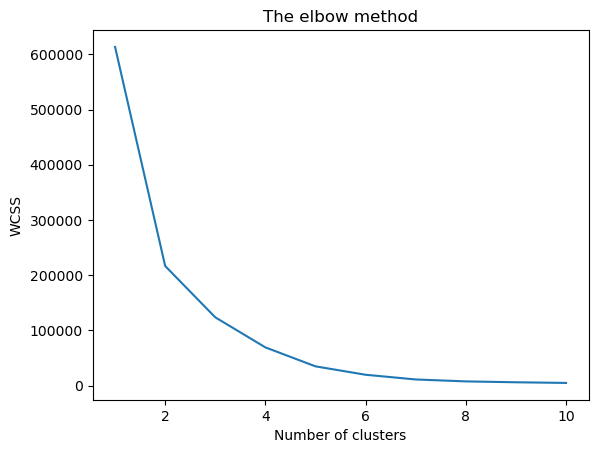

In [680]:
#Finding the optimum number of clusters for k-means 

wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()
warnings.filterwarnings('ignore')

In [430]:
# Instantiate the KMeans models
km = KMeans(n_clusters = 2, random_state=0)

# Fit the KMeans model
km.fit_predict(x)

# Calculate Silhoutte Score
score = silhouette_score(x, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.632


### 5.2. Linear Regression
- prediction of number of accommodations according to activities and attractions

In [515]:
combined_df.head()

,accommodation,activities,attractions
county,,,
Kerry,321,535,33.0
Cork,268,653,26.0
Galway,257,504,14.0
Dublin,234,1140,1.0
Donegal,197,391,7.0


In [517]:
X = combined_df[['activities','attractions']]
y = combined_df['accommodation']

<Axes: xlabel='activities', ylabel='attractions'>

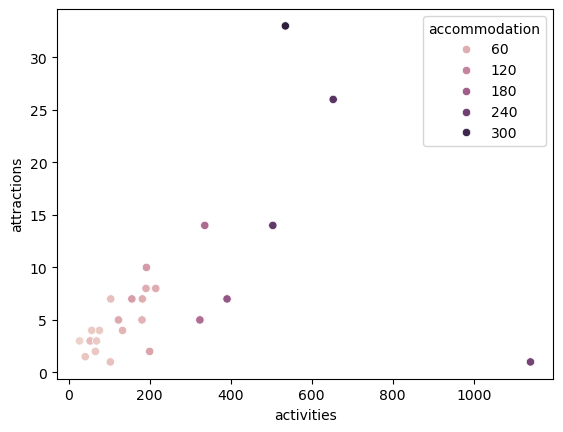

In [519]:
sns.scatterplot(x=combined_df['activities'], y=combined_df['attractions'], hue=combined_df['accommodation'] )

In [543]:
#create the regression model object and fit the data into it
reg_obj = linear_model.LinearRegression()

reg_obj.fit(X,y)

LinearRegression()

In [589]:
#predict the accommodation per 10 activities and 10 atractions
predicted_accommodation = reg_obj.predict([[10,10]])
print(f"Predicted Accommodation :{predicted_accommodation} ")

Predicted Accommodation :[58.68319967] 


In [583]:
#diplay the coefficients
print(reg_obj.coef_)

[0.23100648 5.77183555]


In [575]:
# Accuracy according to r2_score

regressor = LinearRegression()
regressor.fit(X,y)
r2_score = regressor.score(X,y)
print(r2_score*100,'%')

R^2 Score: 90.68%


### 5.3. Decision Tree Regressor
- predicting Accommodation based on the activities and attractions

In [595]:
# import the regressor 
X = combined_df[['activities','attractions']]
y = combined_df['accommodation']

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

In [601]:
# predicting Accommodation acconrding to "Activities" and "Attractions"
  
# test the output by changing values 50 activities, 100 attractions
y_pred = regressor.predict([[50,100]]) 
  
# print the predicted price 
print("Predicted Accommodation: % d\n"% y_pred) 

Predicted Accommodation:  38



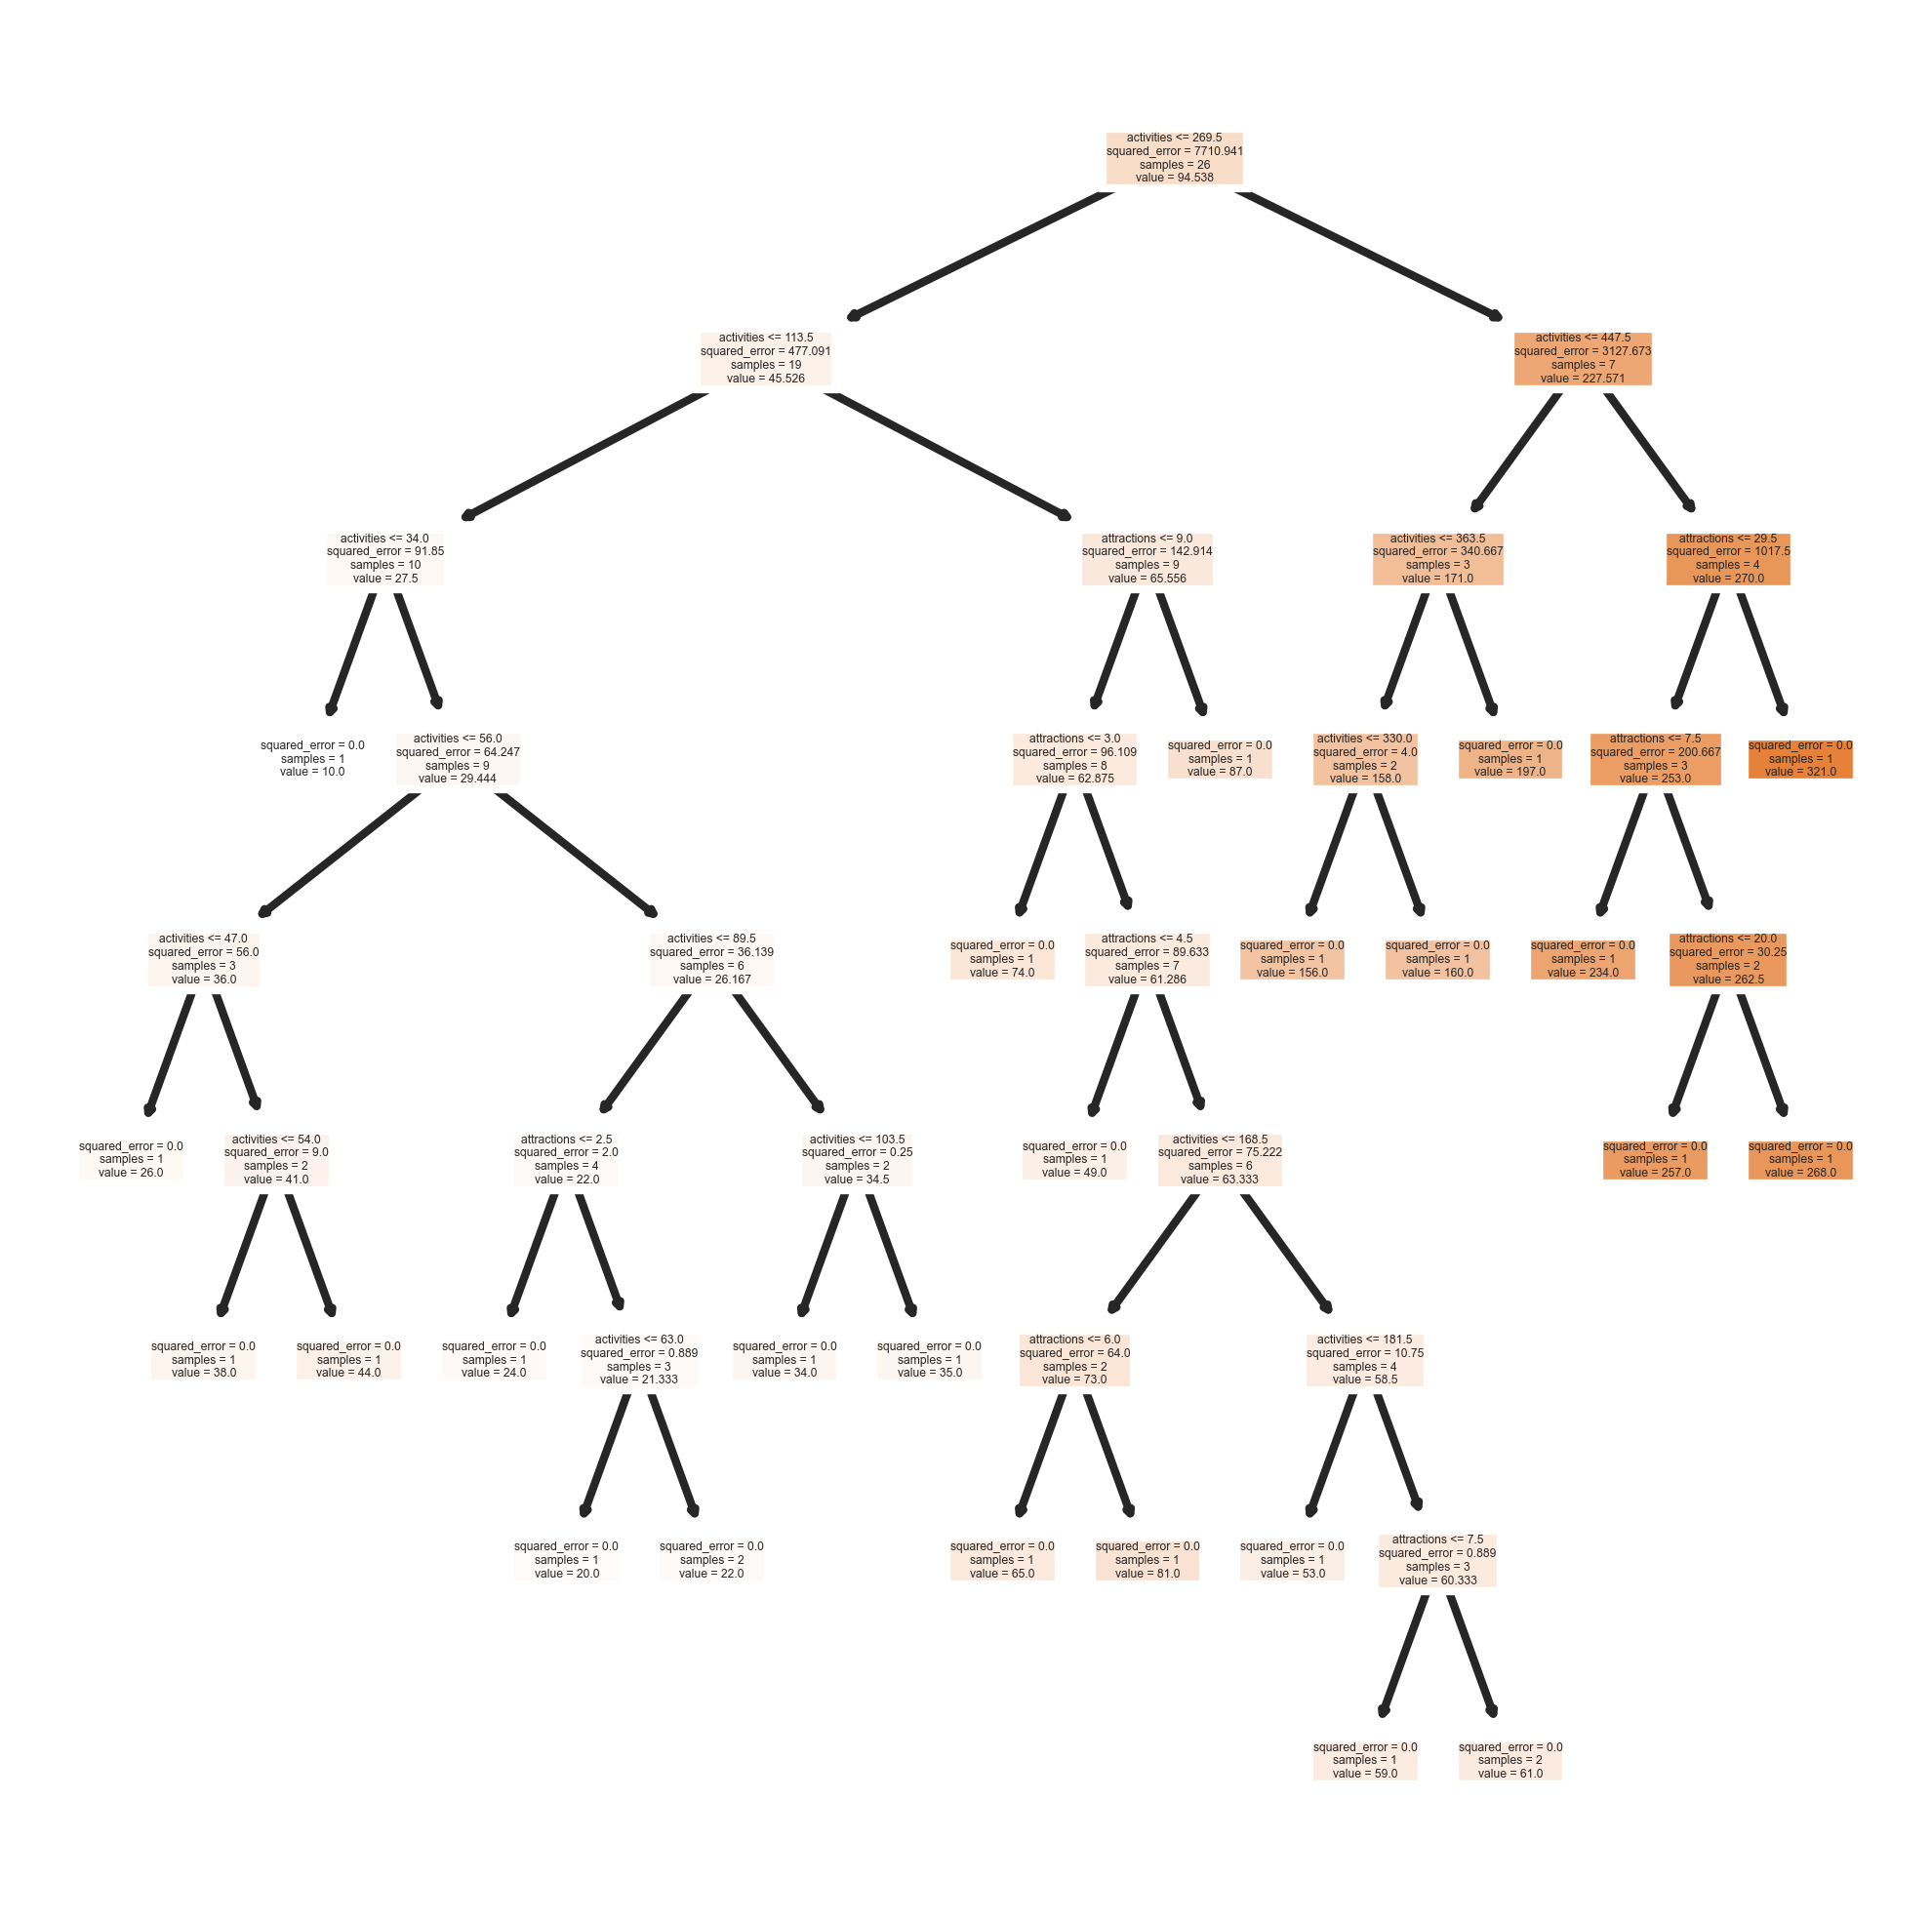

In [560]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
fn=["activities","attractions"]
cn=["accommodation"]
tree.plot_tree(regressor,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [625]:
# Accuracy the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Calculate the R² score
r2 = regressor.score(X, y) 
print(f"R² Score: {r2 * 100:.2f}%")

R² Score: 100.00%


### 5.4. Comparison of Regression Models

In [635]:

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "k-Nearest Neighbour": KNeighborsRegressor(n_neighbors = 7),
    "Support Vector Machine": SVR(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100)
    
    
}

In [659]:
# Store results
results = []
X = combined_df[['activities','attractions']]
y = combined_df['accommodation']
  
# Split the data into training and testing sets before fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append([name, mae, mse, rmse, r2])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])
print(results_df)

           Model        MAE           MSE        RMSE  R2 Score
0          Lasso  16.370859    338.363537   18.394661  0.966683
1  Decision Tree  21.666667    763.000000   27.622455  0.924871
2  Random Forest  23.223333    989.734533   31.460047  0.902545
3            KNN  29.000000   2319.453333   48.160703  0.771613
4            SVR  58.176612  11545.300474  107.449060 -0.136818


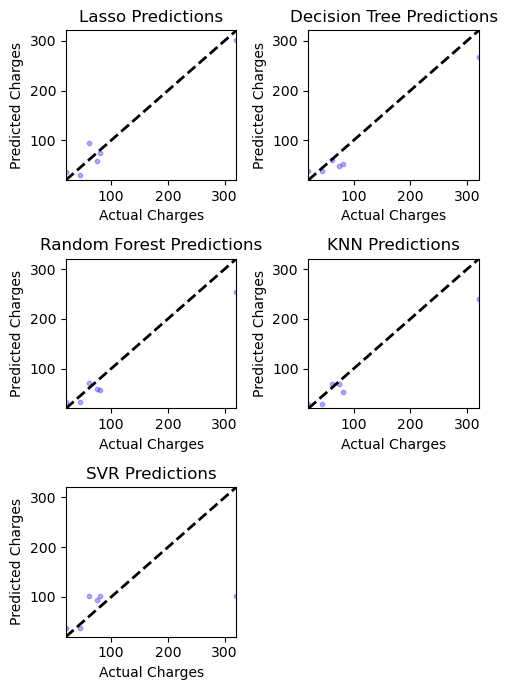

In [661]:
# Plotting actual vs predicted for each model vertically with smaller size
plt.figure(figsize=(5, 7))  # Adjusted size for a more compact vertical layout

# Get the actual test targets (y_test)
for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns
    plt.scatter(y_test, y_pred, alpha=0.3, color='blue', s=10)  # Set color to blue and size to 10
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.title(f'{name} Predictions')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()

### 5.5. Hyperparameter Tuning using GridSearchCV

In [718]:

X = combined_df[['activities','attractions']]
y = combined_df['accommodation']

# Set up parameter grids for each model
param_grid = {
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},  # Lasso regularization parameter
    'Decision Tree': {'max_depth': [5, 10, 15]},  # Maximum depth of the tree
    'Random Forest': {'n_estimators': [50, 100, 200]},  # Number of trees in the forest
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2], 'metric': ['minkowski', 'euclidean', 'cityblock']},  # KNN parameters
    'SVR': {'C': [100, 1000, 10000, 50000], 'gamma': [1, 0.5, 0.1, 0.01], 'kernel': ['rbf']}  # SVR parameters
}

# Store results in an array
results = []
predictions = {}  # To store predictions for plotting

# Define the models in a dictionary
models = {
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    
}


# Train and tune models using Grid Search for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='r2')  # 5-fold CV for R²
    
    # Split the data into training and testing sets before fitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Store results
    results.append([name, best_params, best_score])
    
    # Fit the best model on the training data
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Store predictions for plotting
    predictions[name] = y_pred

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Best Parameters", "Best CV R² Score"])
print("\nBest Hyperparameters and Scores from Grid Search:")
print(results_df)


Best Hyperparameters and Scores from Grid Search:
           Model                                    Best Parameters  \
0          Lasso                                    {'alpha': 10.0}   
1  Decision Tree                                  {'max_depth': 10}   
2  Random Forest                              {'n_estimators': 200}   
3            KNN  {'metric': 'minkowski', 'n_neighbors': 3, 'p': 2}   
4            SVR         {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}   

   Best CV R² Score  
0          0.248372  
1          0.843295  
2          0.838110  
3          0.854531  
4         -0.773829  


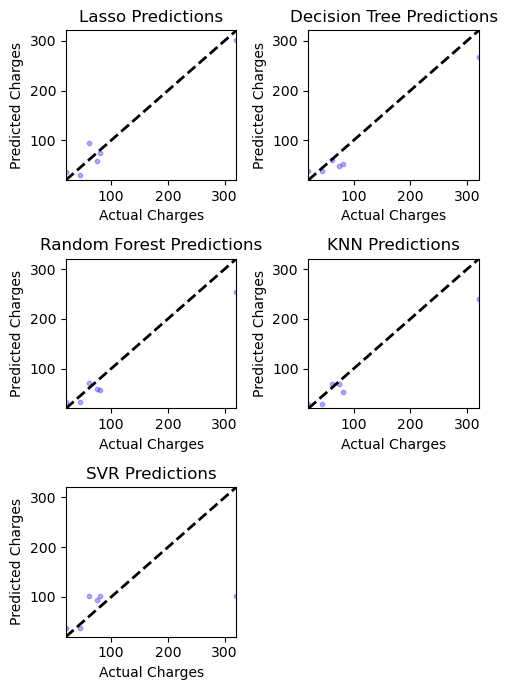

In [650]:
# Plotting actual vs predicted for each model vertically with smaller size
plt.figure(figsize=(5, 7))  # Adjusted size for a more compact vertical layout

# Get the actual test targets (y_test)
for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns
    plt.scatter(y_test, y_pred, alpha=0.3, color='blue', s=10)  # Set color to blue and size to 10
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.title(f'{name} Predictions')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()